In [1]:
import pandas as pd
import json
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_csv('D:\DeepMost\DeepMost_Agentic_SDR\data\processed\simulations_master.csv')
df.head()

,simulation_id,timestamp,target_url,company_context_length,num_turns,total_seller_words,total_buyer_words,avg_seller_turn_length,avg_buyer_turn_length,score,outcome,key_objection,feedback,conversation_file,source
0,43290c94-50b8-418e-b69a-fe7a0f601def,2026-02-08T13:04:57.026424,https://deepmostai.com,1510,3,254,174,63.50,58.00,5,Success,Unknown,Auto-generated from batch pipeline. Sentiment:...,43290c94-50b8-418e-b69a-fe7a0f601def.json,interactive
1,752c57c7-3f4b-4f17-860e-174c717bb689,2026-02-08T13:05:17.121356,https://stripe.com,3000,3,282,159,94.00,53.00,5,Success,Unknown,Auto-generated from batch pipeline. Sentiment:...,752c57c7-3f4b-4f17-860e-174c717bb689.json,interactive
2,7b97d187-c4d2-45f7-befa-b00dfed4e88a,2026-02-08T23:24:18.907347,https://www.zoho.com/,3000,4,163,149,40.75,37.25,9,Success,Price,The seller demonstrated excellent objection ha...,7b97d187-c4d2-45f7-befa-b00dfed4e88a.json,interactive
3,f8c7a6c3-65d5-42af-aebc-86c02028eb53,2026-02-11T13:48:02.016120,https://www.apollo.io/,3000,4,181,119,45.25,29.75,6,Pending,Integration/Vendor Lock-in,Focus on demonstrating tangible value and addr...,f8c7a6c3-65d5-42af-aebc-86c02028eb53.json,interactive
4,ff7f940f-c730-48fa-a195-10c060b068a0,2026-02-11T13:51:23.910688,https://www.google.com/,363,4,200,148,50.00,37.00,6,Success,Price,The seller successfully shifted from a feature...,ff7f940f-c730-48fa-a195-10c060b068a0.json,interactive


In [3]:
df = df.dropna(subset=['conversation_file', 'outcome'])

In [4]:
df

,simulation_id,timestamp,target_url,company_context_length,num_turns,total_seller_words,total_buyer_words,avg_seller_turn_length,avg_buyer_turn_length,score,outcome,key_objection,feedback,conversation_file,source
0,43290c94-50b8-418e-b69a-fe7a0f601def,2026-02-08T13:04:57.026424,https://deepmostai.com,1510,3,254,174,63.50,58.00,5,Success,Unknown,Auto-generated from batch pipeline. Sentiment:...,43290c94-50b8-418e-b69a-fe7a0f601def.json,interactive
1,752c57c7-3f4b-4f17-860e-174c717bb689,2026-02-08T13:05:17.121356,https://stripe.com,3000,3,282,159,94.00,53.00,5,Success,Unknown,Auto-generated from batch pipeline. Sentiment:...,752c57c7-3f4b-4f17-860e-174c717bb689.json,interactive
2,7b97d187-c4d2-45f7-befa-b00dfed4e88a,2026-02-08T23:24:18.907347,https://www.zoho.com/,3000,4,163,149,40.75,37.25,9,Success,Price,The seller demonstrated excellent objection ha...,7b97d187-c4d2-45f7-befa-b00dfed4e88a.json,interactive
3,f8c7a6c3-65d5-42af-aebc-86c02028eb53,2026-02-11T13:48:02.016120,https://www.apollo.io/,3000,4,181,119,45.25,29.75,6,Pending,Integration/Vendor Lock-in,Focus on demonstrating tangible value and addr...,f8c7a6c3-65d5-42af-aebc-86c02028eb53.json,interactive
4,ff7f940f-c730-48fa-a195-10c060b068a0,2026-02-11T13:51:23.910688,https://www.google.com/,363,4,200,148,50.00,37.00,6,Success,Price,The seller successfully shifted from a feature...,ff7f940f-c730-48fa-a195-10c060b068a0.json,interactive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,5bb333ff-a956-4832-8246-0ee1eacce573,2026-02-24T14:49:48.208024,https://www.anodot.com,3000,4,205,192,51.25,48.00,4,Failure,Timing,The seller should have more aggressively addre...,5bb333ff-a956-4832-8246-0ee1eacce573.json,dynamic_batch
230,b62faa88-fb12-44c3-9f2d-615c667e3eb9,2026-02-24T14:49:55.641153,https://www.applitools.com,3000,4,216,199,54.00,49.75,4,Failure,Timing,The seller should have more aggressively addre...,b62faa88-fb12-44c3-9f2d-615c667e3eb9.json,dynamic_batch
231,633b6943-81ca-4e75-bb8a-ad72e10003dd,2026-02-24T14:53:53.874977,https://www.arcadia.io,17,4,212,218,53.00,54.50,5,Pending,Unknown,Sentiment: Neutral,633b6943-81ca-4e75-bb8a-ad72e10003dd.json,dynamic_batch
232,888e6f1f-4278-4f6d-8b85-423371a895b3,2026-02-24T15:02:01.832100,https://www.axonius.com,1354,4,191,197,47.75,49.25,5,Pending,Unknown,Sentiment: Neutral,888e6f1f-4278-4f6d-8b85-423371a895b3.json,dynamic_batch


2. Data Preprocessing & Feature Engineering

In [5]:
CONVERSATION_DIR = 'D:\\DeepMost\\DeepMost_Agentic_SDR\\data\\raw\\conversations'
def extract_early_conversation(filename):
    file_path = os.path.join(CONVERSATION_DIR, filename)
    if not os.path.exists(file_path):
        return ''
    try:
        with open(file_path, 'r', encoding='utf-8') as f:
            data = json.load(f)
        # Pull the dictionary's 'conversation' list
        history = data.get('conversation', [])
        early_turns = history[:3]
        # Use the correct key: 'message'
        early_text = ' '.join([f"{msg.get('speaker', '')}: {msg.get('message', '')}" for msg in early_turns])
        return early_text
    except Exception as e:
        print(f"Failed to parse {filename}: {e}")
        return ''

df['early_text'] = df['conversation_file'].apply(extract_early_conversation)
df = df[df['early_text'] != '']


In [6]:
# Binarize the Target Variable (Outcome)
# Ensure we capture Success vs Failure
# If your outcomes are "Success", "Pending", "Failed" etc. 
# We map anything containing "Success" or "Meeting" to 1, everything else 0.
success_labels = ['Success', 'Meeting Booked', 'Nurture']
df['target'] = df['outcome'].apply(lambda x: 1 if any(label.lower() in str(x).lower() for label in success_labels) else 0)
# Check class balance
print(f"Class Balance: {df['target'].value_counts().to_dict()}")

Class Balance: {0: 197, 1: 37}


In [7]:
# 3. Train-Test Split
X = df['early_text']
y = df['target']

# 80% for training, 20% for testing unseen data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

4. TF-IDF Vectorization & Model Training

In [8]:
# Convert text into numbers based on sequence frequency 
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [9]:
# Fix class imbalance using SMOTE
# This generates synthetic 'Success' examples so the model doesn't just guess 'Failed' every time
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_vec, y_train)
print(f'New balanced training class distribution: {pd.Series(y_train_resampled).value_counts().to_dict()}')
# Train the Random Forest with reduced depth to prevent overfitting the exact SMOTE points
clf = RandomForestClassifier(n_estimators=200, max_depth=5, class_weight='balanced_subsample', random_state=42)
clf.fit(X_train_resampled, y_train_resampled)

New balanced training class distribution: {0: 157, 1: 157}


RandomForestClassifier(class_weight='balanced_subsample', max_depth=5,
                       n_estimators=200, random_state=42)

In [10]:
# 5. Evaluation & Interpretation
y_pred = clf.predict(X_test_vec)
print("\n--- Classification Report ---")



--- Classification Report ---


In [11]:
print(classification_report(y_test, y_pred, target_names=['Failed (0)', 'Success (1)']))

              precision    recall  f1-score   support

  Failed (0)       0.89      1.00      0.94        40
 Success (1)       1.00      0.29      0.44         7

    accuracy                           0.89        47
   macro avg       0.94      0.64      0.69        47
weighted avg       0.91      0.89      0.87        47



-> Saved 'confusion_matrix.png'


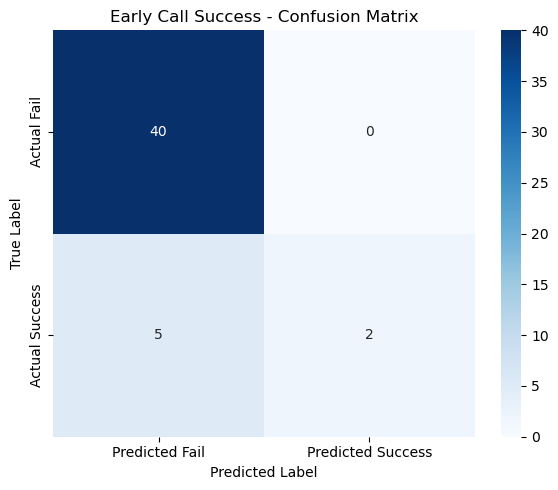

In [12]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Fail', 'Predicted Success'], yticklabels=['Actual Fail', 'Actual Success'])
plt.title('Early Call Success - Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.savefig('confusion_matrix.png') 
print("-> Saved 'confusion_matrix.png'")

In [13]:
# Feature Importance: Discover which words determine a win vs a loss!
feature_names = vectorizer.get_feature_names_out()
importances = clf.feature_importances_

In [14]:

# Get top 20 most important words
indices = np.argsort(importances)[::-1][:20]

-> Saved 'feature_importance.png'

Done! Classification is complete.


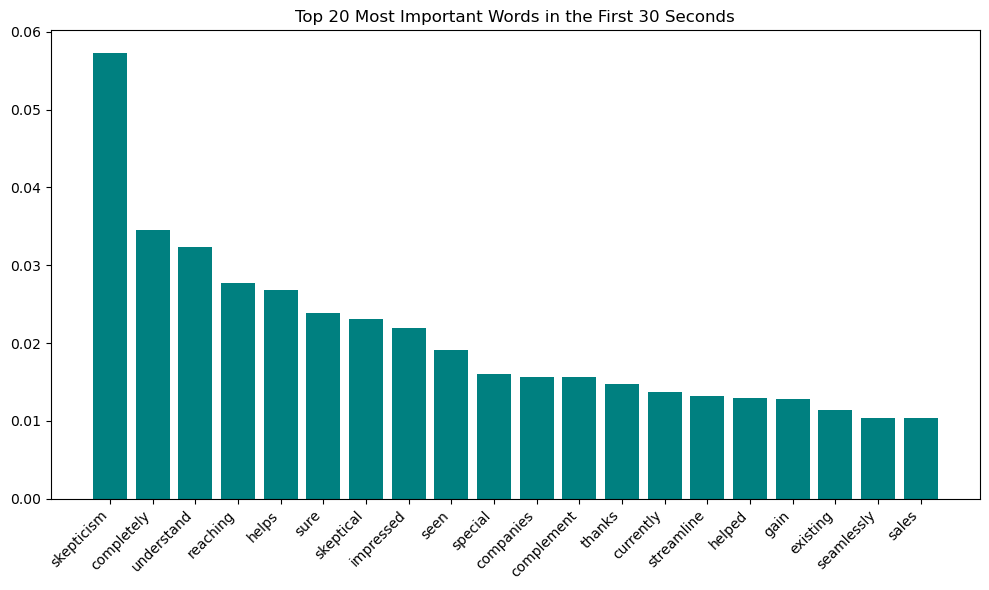

In [15]:
plt.figure(figsize=(10, 6))
plt.title("Top 20 Most Important Words in the First 30 Seconds")
plt.bar(range(20), importances[indices], align="center", color='teal')
plt.xticks(range(20), [feature_names[i] for i in indices], rotation=45, ha='right')
plt.tight_layout()
plt.savefig('feature_importance.png')
print("-> Saved 'feature_importance.png'")
print("\nDone! Classification is complete.")